In [3]:
# The code was removed by Watson Studio for sharing.

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [4]:
df.sort_values(['Very interested'], ascending = False, axis = 0, inplace = True)
df= df.divide(2233)
df = df.multiply(100)
df = df.round(2)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


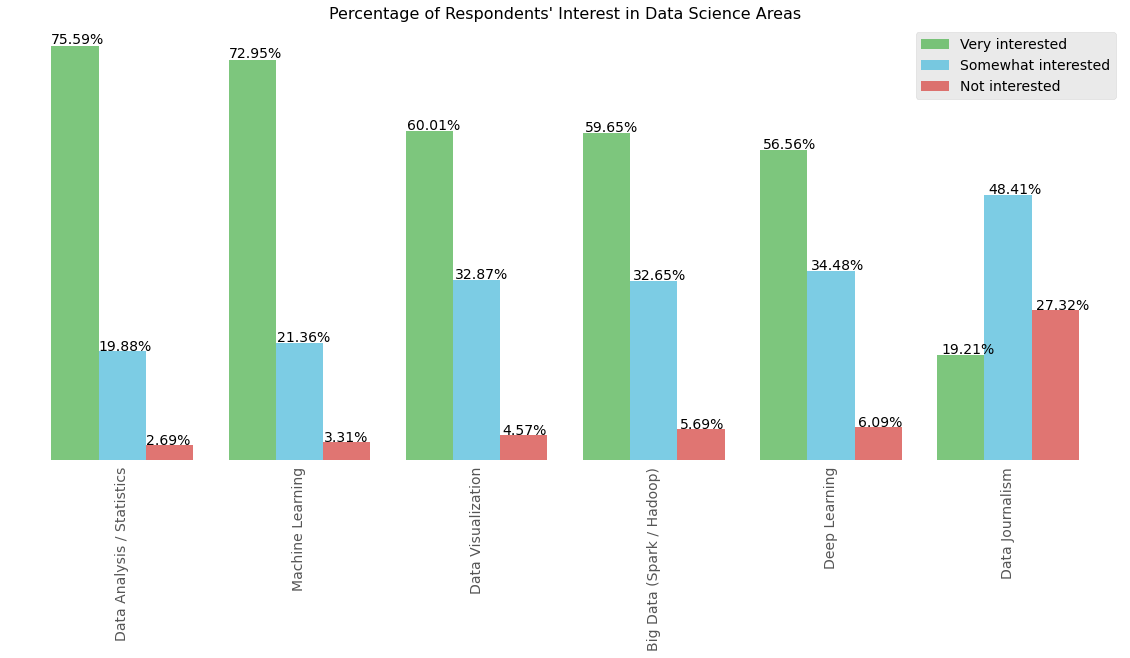

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

color_list = ['#5cb85c', '#5bc0de', '#d9534f']

ax = df.plot.bar(figsize = (20, 8), alpha = 0.8, width = 0.8, color = color_list)
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize = 16)

legend = ax.legend(fontsize='14')
ax.tick_params(axis='x', labelsize=14)
ax.set_xlabel('')

#Putting the percentage values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
    
ax.set_facecolor('xkcd:white')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

In [19]:
dsf = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

dsfpd = dsf[['PdDistrict', 'X']]


dsfc = dsfpd.groupby(['PdDistrict']).count()

dsfc = dsfc.reset_index()
dsfc.columns = ['Neighborhood', 'Count']


dsfc.head(10)

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [21]:
!pip install folium
import folium
from IPython.display import display

     |████████████████████████████████| 93 kB 2.1 MB/s eta 0:00:011


In [22]:
# download the map of sanfranciso
!wget https://cocl.us/sanfran_geojson -O sanfran_geo.json

--2020-12-14 03:03:56--  https://cocl.us/sanfran_geojson
Resolving cocl.us (cocl.us)... 169.63.96.194, 169.63.96.176
Connecting to cocl.us (cocl.us)|169.63.96.194|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson [following]
--2020-12-14 03:03:57--  https://ibm.box.com/shared/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson
Resolving ibm.box.com (ibm.box.com)... 107.152.29.197
Connecting to ibm.box.com (ibm.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson [following]
--2020-12-14 03:03:57--  https://ibm.box.com/public/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.geojson
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9luw8hp6klzopv2p9zg11uy2y0fmzrr5.

In [30]:
sf_g = r'sanfran_geo.json'

sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

sf_map.choropleth(
    geo_data=sf_g,
    data=dsfc,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map

To View Full notebook with Map: https://nbviewer.jupyter.org/github/Nehaal-Patel/Data-Science-Professional-IBM/blob/master/Data-Visualization-with-Python/Data-Visualization-with-Python-Final-Assignment.ipynb